# Introduction to K-Means Clustering:

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate 
the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the 
sum of distances between the points and their respective cluster centroid.

Step 1: Choose the number of clusters k
    

Step 2: Select k random points from the data as centroids

Step 3: Assign all the points to the closest cluster centroid

Step 4: Recompute the centroids of newly formed clusters

Step 5: Repeat steps 3 and 4

Stopping Criteria for K-Means Clustering
There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:



1.Centroids of newly formed clusters do not change

2.Points remain in the same cluster

3.Maximum number of iterations are reached

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [22]:
data = pd.read_csv("C:/Users/eshsanc/Downloads/Wholesale_customers_data.csv")
data.head(100)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [23]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
data_scaled = scaler.fit_transform(data)

In [29]:
data1 = pd.DataFrame(data_scaled)
data1

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
5,1.448652,0.590668,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224
6,1.448652,0.590668,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854
7,1.448652,0.590668,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601
8,-0.690297,0.590668,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079
9,1.448652,0.590668,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461


In [11]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.inertia_

2599.38555935614

In [13]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init = 'k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

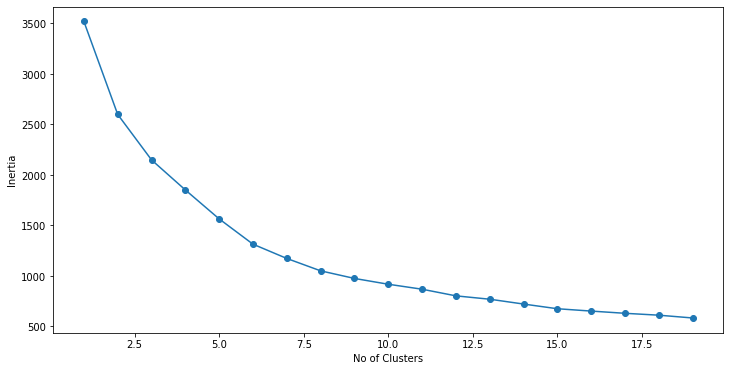

In [14]:
frame = pd.DataFrame({'Cluster': range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame ['SSE'], marker = 'o')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')

In [16]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [17]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [20]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()
print('''So, there are 234 data points belonging to cluster 4 (index 3),
      then 125 points in cluster 2 (index 1), and so on. 
      This is how we can implement K-Means Clustering in Python.''')

So, there are 234 data points belonging to cluster 4 (index 3),
      then 125 points in cluster 2 (index 1), and so on. 
      This is how we can implement K-Means Clustering in Python.
